In [13]:
# Librerias
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
#import session_info
import upsetplot

In [14]:
# linea para correr el notebook utils
%run utils.ipynb

## Cargar los datos desde la Web

In [15]:
# Guardar la url en una variable
datos_url = 'https://github.com/njtierney/naniar/raw/master/data/'

# Almacenar los nombres de los archivos a descargar en una lista
datasets_names = ('oceanbuoys', 'pedestrian', 'riskfactors')

# Almacenar el tipo de extension en una variable
extension = '.rda'

# diccionario que almacena los archivos descargados
datasets_dfs = {} 

for dataset_name in datasets_names:

    dataset_file = f'{ dataset_name }{ extension }' # almacena el nombre de cada archivo con su respectiva extension
    dataset_output_file = f'./data/{ dataset_file }' # ruta y nombre donde se guarda los archivos
    dataset_url = f'{ datos_url }{ dataset_file }' # url de cada archivo a descargar

    !wget -q -O { dataset_output_file } { dataset_url } # linea que descarga los archivos

    # almacenar en el diccionario los archivos descargados
    datasets_dfs[f'{ dataset_name }_df'] = pyreadr.read_r(dataset_output_file).get(dataset_name)

# accede a las llaves del diccionario para verificar que los archivos se hayan cargado
datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

### Incluir los datos en el ambiente local

In [16]:
locals().update(**datasets_dfs)
# elimina el diccionario para dejar solamente los dataframes
del datasets_dfs

In [17]:
# carga del dataframe
pedestrian_df.shape

(37700, 9)

El dataframe contiene 37700 registros y 9 variables

## EDA de los datos

In [18]:
# vista general del dataframe
pedestrian_df

,hourly_counts,date_time,year,month,month_day,week_day,hour,sensor_id,sensor_name
0,883,2016-01-01 00:00:00,2016,January,1,Friday,0,2,Bourke Street Mall (South)
1,597,2016-01-01 01:00:00,2016,January,1,Friday,1,2,Bourke Street Mall (South)
2,294,2016-01-01 02:00:00,2016,January,1,Friday,2,2,Bourke Street Mall (South)
3,183,2016-01-01 03:00:00,2016,January,1,Friday,3,2,Bourke Street Mall (South)
4,118,2016-01-01 04:00:00,2016,January,1,Friday,4,2,Bourke Street Mall (South)
...,...,...,...,...,...,...,...,...,...
37695,349,2016-12-31 19:00:00,2016,December,31,Saturday,19,23,Spencer St-Collins St (South)
37696,337,2016-12-31 20:00:00,2016,December,31,Saturday,20,23,Spencer St-Collins St (South)
37697,356,2016-12-31 21:00:00,2016,December,31,Saturday,21,23,Spencer St-Collins St (South)
37698,459,2016-12-31 22:00:00,2016,December,31,Saturday,22,23,Spencer St-Collins St (South)


In [19]:
# tipos de datos
pedestrian_df.dtypes

hourly_counts            object
date_time        datetime64[ns]
year                      int32
month                  category
month_day                 int32
week_day               category
hour                      int32
sensor_id                 int32
sensor_name              object
dtype: object

Hay 4 variables de tipo entera, 2 categoricas, 2 de tipo objeto y 1 de tipo fecha

In [20]:
# variables que contienen valores nulos
(
    pedestrian_df
    .isna()
    .any()
)

hourly_counts     True
date_time        False
year             False
month            False
month_day        False
week_day         False
hour             False
sensor_id        False
sensor_name      False
dtype: bool

Tenemos valores faltantes solo en una variable. En este caso, para la variable 'cantidad de horas'

In [21]:
# cantidad de valores nulos por variables
(
    pedestrian_df
    .isnull()
    .sum()
)

hourly_counts    2548
date_time           0
year                0
month               0
month_day           0
week_day            0
hour                0
sensor_id           0
sensor_name         0
dtype: int64

Hay 2548 missing en la variable cantidad de horas

In [22]:
# numero total de valores nulos
(
    pedestrian_df
    .isnull()
    .sum()
    .sum()
)

2548

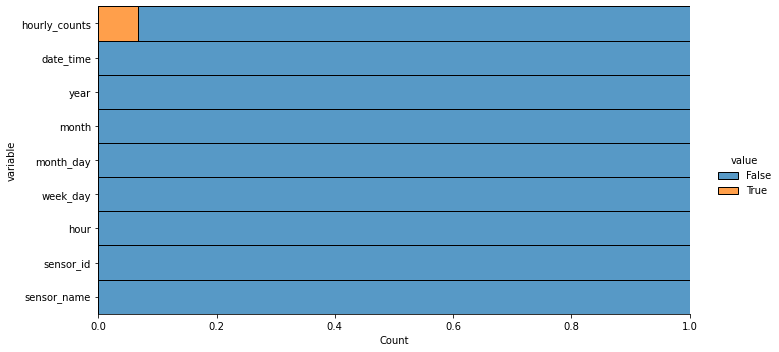

In [24]:
# visualizacion de la proporcion de valores nulos por cada variable

(
    pedestrian_df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill',
                aspect=2
            )
        )
    )
)